⚙️ 重新从 .mat 文件生成数据
训练集大小: (4937, 256, 1) (4937,)
验证集大小: (1235, 256, 1) (1235,)
跨工况测试集大小(1hp): (6174, 256, 1) (6174,)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 256, 16)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 128, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 128, 32)             │           2,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 64, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 64, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 32, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,490 (1.04 MB)

 Trainable params: 272,490 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3696 - loss: 1.8055 - val_accuracy: 0.7409 - val_loss: 0.8571 - learning_rate: 0.0010
Epoch 2/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7190 - loss: 0.8184 - val_accuracy: 0.8316 - val_loss: 0.4666 - learning_rate: 0.0010
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8250 - loss: 0.4892 - val_accuracy: 0.9190 - val_loss: 0.2824 - learning_rate: 0.0010
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8853 - loss: 0.3354 - val_accuracy: 0.9425 - val_loss: 0.1934 - learning_rate: 0.0010
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9197 - loss: 0.2274 - val_accuracy: 0.9482 - val_loss: 0.1468 - learning_rate: 0.0010
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9225 - loss: 0.2110 - val_accuracy: 0.9644 - val_loss: 0.1099 - learning_rate: 0.0010
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9529 - loss: 0.1442 - val_accuracy:

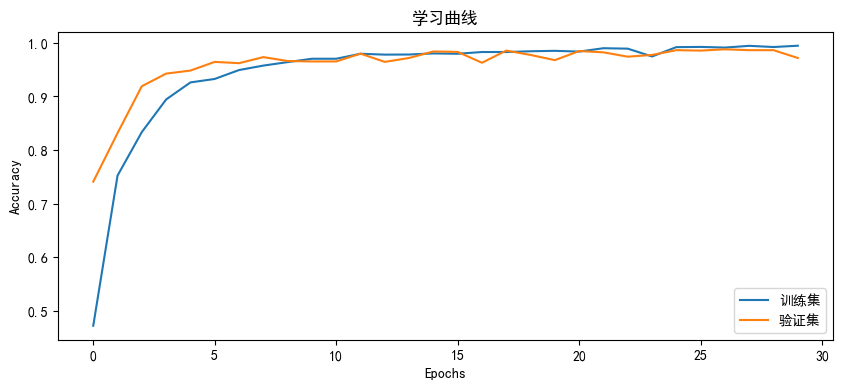

193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


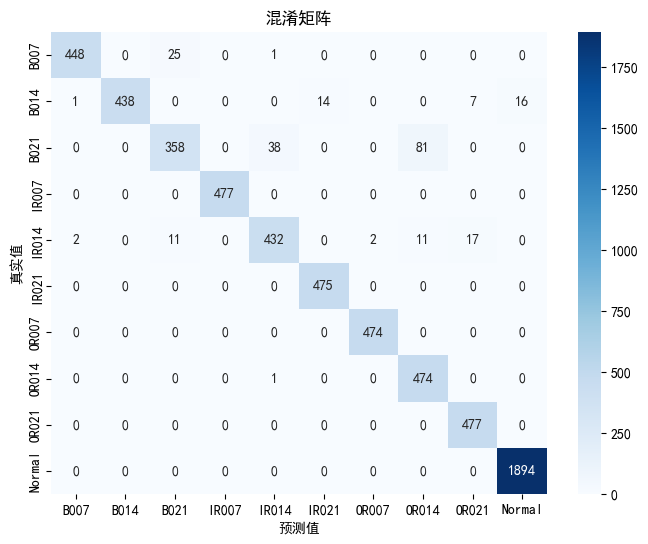

              precision    recall  f1-score   support

        B007       0.99      0.95      0.97       474
        B014       1.00      0.92      0.96       476
        B021       0.91      0.75      0.82       477
       IR007       1.00      1.00      1.00       477
       IR014       0.92      0.91      0.91       475
       IR021       0.97      1.00      0.99       475
       OR007       1.00      1.00      1.00       474
       OR014       0.84      1.00      0.91       475
       OR021       0.95      1.00      0.98       477
      Normal       0.99      1.00      1.00      1894

    accuracy                           0.96      6174
   macro avg       0.96      0.95      0.95      6174
weighted avg       0.96      0.96      0.96      6174



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 或 'Microsoft YaHei'
matplotlib.rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

# ===============================
# 1. 文件路径配置（1hp用于训练/验证，2hp用于测试）
# ===============================
file_paths_1hp = [
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/B007_1.mat",   # B007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/B014_1.mat",   # B014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/B021_1.mat",   # B021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/IR007_1.mat",  # IR007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/IR014_1.mat",  # IR014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/IR021_1.mat",  # IR021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/OR007@6_1.mat",# OR007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/OR014@6_1.mat",# OR014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/OR021@6_1.mat",# OR021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/Normal Baseline Data/Normal_1.mat"                     # Normal
]
file_paths_2hp = [
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/B007_2.mat",   # B007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/B014_2.mat",   # B014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/B021_2.mat",   # B021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/IR007_2.mat",  # IR007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/IR014_2.mat",  # IR014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/IR021_2.mat",  # IR021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.007/OR007@6_2.mat",# OR007
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.014/OR014@6_2.mat",# OR014
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/12k Drive End Bearing Fault Data/0.021/OR021@6_2.mat",# OR021
    r"D:/HuaweiMoveData/Users/hps_h/Desktop/CWRU/Normal Baseline Data/Normal_2.mat"                     # Normal
]
labels = list(range(10))

segment_length = 256
test_size = 0.2       # 只用于 0hp 内部 train/val 划分之前的 train/test？——这次不用它来切 1hp
val_size  = 0.2       # 从 0hp 的训练部分再划验证
overlap   = 0.0

# 保存目录
save_dir = r"D:\study\code\Model Training\1D-CNN\Diff Working Conditions\1hp to 2hp"

# ===============================
# 2. 数据预处理函数
# ===============================
def load_and_segment_data(file_paths, labels, segment_length, overlap):
    X, y = [], []
    step = int(segment_length * (1 - overlap))  # 步长
    for file, label in zip(file_paths, labels):
        mat_dict = loadmat(file)
        key = [k for k in mat_dict.keys() if "DE_time" in k][0]   # 驱动端数据
        signal = mat_dict[key].squeeze()

        # 带重叠切片
        segments = []
        for start in range(0, len(signal) - segment_length + 1, step):
            seg = signal[start:start + segment_length]
            segments.append(seg)
        segments = np.array(segments)

        X.append(segments)
        y.extend([label] * len(segments))

    X = np.vstack(X)
    y = np.array(y)
    return X, y

# ===============================
# 3. 数据加载
# ===============================
save_files = [os.path.join(save_dir, f) for f in ["X_train.npy","y_train.npy","X_val.npy","y_val.npy","X_test.npy","y_test.npy"]]

if all(os.path.exists(f) for f in save_files):
    print("✅ 发现已有预处理数据，直接加载")
    X_train = np.load(os.path.join(save_dir, "X_train_1to2.npy"))
    y_train = np.load(os.path.join(save_dir, "y_train_1to2.npy"))
    X_val   = np.load(os.path.join(save_dir, "X_val_1to2.npy"))
    y_val   = np.load(os.path.join(save_dir, "y_val_1to2.npy"))
    X_test  = np.load(os.path.join(save_dir, "X_test_1to2.npy"))
    y_test  = np.load(os.path.join(save_dir, "y_test_1to2.npy"))
else:
    print("⚙️ 重新从 .mat 文件生成数据")
# ===============================
# 2. 生成数据（1hp -> 供 train/val；2hp -> 供 test）
# ===============================
    X1, y1 = load_and_segment_data(file_paths_1hp, labels, segment_length, overlap)  # 源域
    X2, y2 = load_and_segment_data(file_paths_2hp, labels, segment_length, overlap)  # 目标域（仅测试）
    
    # 0hp 内部分：先划出临时train_full/val临时（保持你的习惯，也可直接 train/val）
    X_train_full, X_val, y_train_full, y_val = train_test_split(
        X1, y1, test_size=val_size, stratify=y1, random_state=42
    )
    
    # 归一化：**只用 0hp 的训练统计量**（避免泄露目标域信息）
    mean, std = np.mean(X_train_full), np.std(X_train_full)
    X_train = ((X_train_full - mean) / std)[..., np.newaxis]
    X_val   = ((X_val       - mean) / std)[..., np.newaxis]
    X_test  = ((X2          - mean) / std)[..., np.newaxis]   # 注意：1hp 仅用 0hp 的均值方差做标准化
    
    y_train = y_train_full
    y_test  = y2

    # 保存
    os.makedirs(save_dir, exist_ok=True)
    np.save(os.path.join(save_dir, "X_train_1to2.npy"), X_train)
    np.save(os.path.join(save_dir, "y_train_1to2.npy"), y_train)
    np.save(os.path.join(save_dir, "X_val_1to2.npy"), X_val)
    np.save(os.path.join(save_dir, "y_val_1to2.npy"), y_val)
    np.save(os.path.join(save_dir, "X_test_1to2.npy"), X_test)
    np.save(os.path.join(save_dir, "y_test_1to2.npy"), y_test)


print("训练集大小:", X_train.shape, y_train.shape)
print("验证集大小:", X_val.shape,   y_val.shape)
print("跨工况测试集大小(1hp):", X_test.shape, y_test.shape)

# ===============================
# 4. 定义 1D-CNN 模型
# ===============================
def build_cnn_1d(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # CNN 堆叠
    x = layers.Conv1D(16, kernel_size=7, padding="same", activation="relu")(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    # 展平 + 全连接分类
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return models.Model(inputs, outputs)

num_classes = len(np.unique(y_train))
model = build_cnn_1d(input_shape=(segment_length,1), num_classes=num_classes)
model.summary()

# ===============================
# 5. 训练模型
# ===============================
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    ReduceLROnPlateau(factor=0.5, patience=5, verbose=1),
    EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# ===============================
# 6. 结果评估
# ===============================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"测试集准确率: {test_acc:.4f}")

# 学习曲线
plt.figure(figsize=(10,4))
plt.plot(history.history["accuracy"], label="训练集")
plt.plot(history.history["val_accuracy"], label="验证集")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend(); plt.title("学习曲线")
plt.show()

# 混淆矩阵及分类报告
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
class_names = ["B007","B014","B021","IR007","IR014","IR021","OR007","OR014","OR021","Normal"]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("预测值"); plt.ylabel("真实值"); plt.title("混淆矩阵")
plt.show()

print(classification_report(y_test, y_pred, target_names=class_names))
